# 파이썬데이터분석 기말과제
#### 학번 : 201804192
#### 전공 : 데이터사이언스
#### 이름: 김민수
## 리뷰 데이터 분석 : 무신사 (MUSINSA)
### 주제 선정 배경
#### 기업에 입장에서 서서 제품을 생산할 때 여러가지 카테고리 마다 고려해야 할 사항이 다르다고 생각한다.
#### 예를 들면 신발을 생산할 때는 착화감, 사이즈, 색상 등이 고려되야 한다고 하면 다른 카테고리 상품인 티셔츠를 생산할 때는 착화감 같은 요소는 고려대상에서 제외될 것이다.
#### 이와 같이 카테고리마다 특수성이 존재하기에 각각의 특수한 고려대상을 파악하기 위해 국내 패션 전문 플랫폼 1위 사이트인 ‘무신사 (MUSINSA)’ 의 리뷰데이터를 분석 하였다. 

### 데이터 분석 계획
#### 1. 무신사의 다양한 카테고리 중 인기 카테고리 추출
#### 2. 추출한 카테고리 기반으로 해당하는 상품 데이터 / 긍정 리뷰 데이터 5개 수집
#### 3. 리뷰속 등장한 빈도 수 분석하여 어떤 단어들이 해당 카테고리에 긍정적인 요인으로 작용했는지 파악

### 데이터 분석 순서
#### 1. 데이터 수집
#### 2. 데이터 전처리
#### 3. EDA
#### 4. 결과 해석

In [116]:
#필요한 패키지 import
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from time import sleep
import requests
import re
import pandas as pd
import numpy as np
import os
import time
import tqdm

from selenium.webdriver.common.keys import Keys

import warnings
warnings.filterwarnings('ignore')

## 1) 데이터 수집

In [5]:
#상품명 및 URL, 가격 크롤링 후 카테고리 부여
url = 'https://www.musinsa.com/categories/item/003002'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

price_list=[re.sub(r'[^0-9]', '', soup.get_text().split()[0]) for soup in soup.find_all('p', attrs={'class':'price'})]

start = 1
title_list = []
url_list = []

while start<2: 
    try:
        url = 'https://www.musinsa.com/categories/item/003002'.format(start)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        
        for soup in soup.find_all('a', attrs={'class':'img-block'}):
            title_list.append(soup['title'])
            url_list.append('https:' + soup['href'])
            
        start += 1
    
    except:
        print(start)
        break

pants_df = pd.DataFrame({'상품명': title_list,
                  'url': url_list,
                   "price":price_list})

pants_df['category'] = '데님 팬츠'
pants_df

,상품명,url,price,category
0,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,데님 팬츠
1,SL01 섬머 데님 와이드 팬츠 (RAW INDIGO),https://www.musinsa.com/app/goods/1885631,49000,데님 팬츠
2,[여름 원단 추가] 이지 와이드 데님 팬츠 그레이,https://www.musinsa.com/app/goods/2092852,52800,데님 팬츠
3,와이드 데님 팬츠 (DEEP GREY),https://www.musinsa.com/app/goods/890338,49000,데님 팬츠
4,[무료반품] 1931 OBJECT JEANS [CROP S...,https://www.musinsa.com/app/goods/978464,78000,데님 팬츠
...,...,...,...,...
85,Banding One Tuck Wide Denim Pant...,https://www.musinsa.com/app/goods/2184088,89000,데님 팬츠
86,selvedge denim pants deep indigo...,https://www.musinsa.com/app/goods/396185,109000,데님 팬츠
87,레귤러 핏 데님 팬츠 [크림],https://www.musinsa.com/app/goods/1322222,49900,데님 팬츠
88,[쿨탠다드] 스트레이트 데님 팬츠 [크림],https://www.musinsa.com/app/goods/2447806,53900,데님 팬츠


In [6]:
#상품명 및 URL, 가격 크롤링 후 카테고리 부여
url = 'https://www.musinsa.com/categories/item/001005'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

price_list=[re.sub(r'[^0-9]', '', soup.get_text().split()[0]) for soup in soup.find_all('p', attrs={'class':'price'})]

start = 1
title_list = []
url_list = []

while start<2: 
    try:
        url = 'https://www.musinsa.com/categories/item/001005'.format(start)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        
        for soup in soup.find_all('a', attrs={'class':'img-block'}):
            title_list.append(soup['title'])
            url_list.append('https:' + soup['href'])
            
        start += 1
    
    except:
        print(start)
        break

mtm_df = pd.DataFrame({'상품명': title_list,
                  'url': url_list,
                   "price":price_list})

mtm_df['category'] = '맨투맨 / 스웨트셔츠'
mtm_df

,상품명,url,price,category
0,베츠 어센틱 맨투맨 그레이,https://www.musinsa.com/app/goods/1557508,69000,맨투맨 / 스웨트셔츠
1,[무료반품] [SS Ver.]헤비 코튼 오버 럭비 맨투맨_...,https://www.musinsa.com/app/goods/2038497,45000,맨투맨 / 스웨트셔츠
2,스웨트셔츠 [블랙],https://www.musinsa.com/app/goods/947067,29900,맨투맨 / 스웨트셔츠
3,980g pigment mtm-charcoal-,https://www.musinsa.com/app/goods/1582356,82000,맨투맨 / 스웨트셔츠
4,캠프 바시티 피그먼트 스웨트셔츠 블루 섀도우,https://www.musinsa.com/app/goods/897632,69000,맨투맨 / 스웨트셔츠
...,...,...,...,...
85,세렝게티 맨투맨 차콜,https://www.musinsa.com/app/goods/2052954,73000,맨투맨 / 스웨트셔츠
86,ORIGIN LOGO CREWNECK BLUE(MG2BSM...,https://www.musinsa.com/app/goods/1111127,49000,맨투맨 / 스웨트셔츠
87,헤이즈 오버핏 스웨트셔츠 [쭈리/기모] 블랙 KJMT236...,https://www.musinsa.com/app/goods/2085363,43000,맨투맨 / 스웨트셔츠
88,스웨트셔츠 [오트밀],https://www.musinsa.com/app/goods/947070,29900,맨투맨 / 스웨트셔츠


In [7]:
#상품명 및 URL, 가격 크롤링 후 카테고리 부여
url = 'https://www.musinsa.com/categories/item/018002'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

price_list=[re.sub(r'[^0-9]', '', soup.get_text().split()[0]) for soup in soup.find_all('p', attrs={'class':'price'})]

start = 1
title_list = []
url_list = []

while start<2: 
    try:
        url = 'https://www.musinsa.com/categories/item/018002'.format(start)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        
        for soup in soup.find_all('a', attrs={'class':'img-block'}):
            title_list.append(soup['title'])
            url_list.append('https:' + soup['href'])
            
        start += 1
    
    except:
        print(start)
        break

shoes_df = pd.DataFrame({'상품명': title_list,
                  'url': url_list,
                   "price":price_list})

shoes_df['category'] = '캔버스 / 단화'
shoes_df

,상품명,url,price,category
0,스타일 36 - 마쉬멜로우:레이싱 레드 / VN0A3DZ3...,https://www.musinsa.com/app/goods/1608838,85000,캔버스 / 단화
1,척테일러 올스타 블랙 옥스 M9166C,https://www.musinsa.com/app/goods/311052,59000,캔버스 / 단화
2,척 70 클래식 블랙 162058C,https://www.musinsa.com/app/goods/810034,95000,캔버스 / 단화
3,[무료반품] 컴피쿠시 원 - (체커보드) 레이싱 레드:마쉬...,https://www.musinsa.com/app/goods/2670201,109000,캔버스 / 단화
4,[무료반품] 올드스쿨 36 DX - (애너하임 팩토리) -...,https://www.musinsa.com/app/goods/695334,99000,캔버스 / 단화
...,...,...,...,...
85,[무료반품] 니짜 - 블랙:화이트 / CQ2332,https://www.musinsa.com/app/goods/1482851,79000,캔버스 / 단화
86,에라 - 블랙:블랙 / VN000QFKBKA1,https://www.musinsa.com/app/goods/165994,69000,캔버스 / 단화
87,[무료반품] 올드스쿨 - 트루 화이트 / VN000D3HW...,https://www.musinsa.com/app/goods/189720,85000,캔버스 / 단화
88,척테일러 올스타 캔버스 리프트 블랙 560250C,https://www.musinsa.com/app/goods/1494177,79000,캔버스 / 단화


In [8]:
#상품명 및 URL, 가격 크롤링 후 카테고리 부여
url = 'https://www.musinsa.com/categories/item/001004'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

price_list=[re.sub(r'[^0-9]', '', soup.get_text().split()[0]) for soup in soup.find_all('p', attrs={'class':'price'})]

start = 1
title_list = []
url_list = []

while start<2: 
    try:
        url = 'https://www.musinsa.com/categories/item/001004'.format(start)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        
        for soup in soup.find_all('a', attrs={'class':'img-block'}):
            title_list.append(soup['title'])
            url_list.append('https:' + soup['href'])
            
        start += 1
    
    except:
        print(start)
        break

hood_df = pd.DataFrame({'상품명': title_list,
                  'url': url_list,
                   "price":price_list})

hood_df['category'] = '후드 티셔츠'
hood_df

,상품명,url,price,category
0,(23SS) 2 TONE ARCH HOODIE GRAY,https://www.musinsa.com/app/goods/2326935,79000,후드 티셔츠
1,에센셜 후드 스웻 셔츠 (MELANGE GREY),https://www.musinsa.com/app/goods/2314616,43000,후드 티셔츠
2,[득템의장] SIGN LOGO HOOD BLACK,https://www.musinsa.com/app/goods/2758254,69000,후드 티셔츠
3,[득템의장] SIGN LOGO HOOD GRAY,https://www.musinsa.com/app/goods/2758252,69000,후드 티셔츠
4,로그 오버핏 기모 후드 그레이 YHHD2302,https://www.musinsa.com/app/goods/1615829,50000,후드 티셔츠
...,...,...,...,...
85,COLLEGE LOGO HOODIE NAVY(MG2BSMM...,https://www.musinsa.com/app/goods/1742318,69000,후드 티셔츠
86,어센틱 로고 후디 네이비,https://www.musinsa.com/app/goods/947495,79000,후드 티셔츠
87,우먼즈 크롭 베어프렌즈 엠보자수 후드 오트밀(FCB3TS3...,https://www.musinsa.com/app/goods/2246471,85000,후드 티셔츠
88,[광복절 기념] Seodaemun Prison Histor...,https://www.musinsa.com/app/goods/1115857,70000,후드 티셔츠


In [9]:
#상품명 및 URL, 가격 크롤링 후 카테고리 부여
url = 'https://www.musinsa.com/categories/item/001002'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

price_list=[re.sub(r'[^0-9]', '', soup.get_text().split()[0]) for soup in soup.find_all('p', attrs={'class':'price'})]

start = 1
title_list = []
url_list = []

while start<2: 
    try:
        url = 'https://www.musinsa.com/categories/item/001002'.format(start)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        
        for soup in soup.find_all('a', attrs={'class':'img-block'}):
            title_list.append(soup['title'])
            url_list.append('https:' + soup['href'])
            
        start += 1
    
    except:
        print(start)
        break

shirts_df = pd.DataFrame({'상품명': title_list,
                  'url': url_list,
                   "price":price_list})

shirts_df['category'] = '셔츠 / 블라우스'
shirts_df

,상품명,url,price,category
0,(시티보이) 오버핏 옥스포드 셔츠_SPYWD23C01,https://www.musinsa.com/app/goods/2272830,39900,셔츠 / 블라우스
1,[무료반품] [23SS Ver.][Package]시티보이 ...,https://www.musinsa.com/app/goods/2646350,94000,셔츠 / 블라우스
2,[무료반품] [Package]시티보이 빅오버 옥스포드 반팔...,https://www.musinsa.com/app/goods/2591897,90000,셔츠 / 블라우스
3,[무료반품] 솔리드 옥스포드 오버셔츠(스카이블루),https://www.musinsa.com/app/goods/1336398,67000,셔츠 / 블라우스
4,(시티보이) 오버핏 옥스포드 반팔셔츠_SPYWD25C01,https://www.musinsa.com/app/goods/3080482,35900,셔츠 / 블라우스
...,...,...,...,...
85,[무료반품] 에브리데이 오버핏 셔츠 [블랙],https://www.musinsa.com/app/goods/2099678,60000,셔츠 / 블라우스
86,젠틀 반오픈 세미 오버핏 긴팔 셔츠 블랙,https://www.musinsa.com/app/goods/2019619,42000,셔츠 / 블라우스
87,[무료반품] [Package]시티보이 빅오버 데님 반팔 셔...,https://www.musinsa.com/app/goods/3230980,109800,셔츠 / 블라우스
88,젠틀 오픈 세미 오버핏 셔츠 화이트,https://www.musinsa.com/app/goods/2005128,38000,셔츠 / 블라우스


In [10]:
#상품명 및 URL, 가격 크롤링 후 카테고리 부여
url = 'https://www.musinsa.com/categories/item/003007'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

price_list=[re.sub(r'[^0-9]', '', soup.get_text().split()[0]) for soup in soup.find_all('p', attrs={'class':'price'})]

start = 1
title_list = []
url_list = []

while start<2: 
    try:
        url = 'https://www.musinsa.com/categories/item/003007'.format(start)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        
        for soup in soup.find_all('a', attrs={'class':'img-block'}):
            title_list.append(soup['title'])
            url_list.append('https:' + soup['href'])
            
        start += 1
    
    except:
        print(start)
        break

cottonpants_df = pd.DataFrame({'상품명': title_list,
                  'url': url_list,
                   "price":price_list})

cottonpants_df['category'] = '코튼 팬츠'
cottonpants_df

,상품명,url,price,category
0,린넨 라이크 세미 와이드 밴딩 팬츠 세트,https://www.musinsa.com/app/goods/1924274,66000,코튼 팬츠
1,[무료반품] [Package][23SS Ver.] 클래식 ...,https://www.musinsa.com/app/goods/2495075,72000,코튼 팬츠
2,[호시 착용] [패키지][써머ver] 쿨 나일론 스트링 팬...,https://www.musinsa.com/app/goods/3141395,73900,코튼 팬츠
3,[여름원단] 와이드 빅포켓 밴딩 카고 팬츠 카키,https://www.musinsa.com/app/goods/2060719,69000,코튼 팬츠
4,[여름원단] 와이드 빅포켓 밴딩 카고 팬츠 진베이지,https://www.musinsa.com/app/goods/2060717,69000,코튼 팬츠
...,...,...,...,...
85,코튼 린넨 원 턱 와이드 팬츠 [카키],https://www.musinsa.com/app/goods/2310616,43900,코튼 팬츠
86,[무료반품] 커브드 절개 와이드 치노 팬츠 브라운,https://www.musinsa.com/app/goods/2699732,49600,코튼 팬츠
87,코튼 린넨 테이퍼드 이지 팬츠 [블랙],https://www.musinsa.com/app/goods/1009418,31900,코튼 팬츠
88,코튼 카고 커팅 밴딩 팬츠 (KHAKI),https://www.musinsa.com/app/goods/2500986,49000,코튼 팬츠


In [11]:
#상품명 및 URL, 가격 크롤링 후 카테고리 부여
url = 'https://www.musinsa.com/categories/item/001001'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

price_list=[re.sub(r'[^0-9]', '', soup.get_text().split()[0]) for soup in soup.find_all('p', attrs={'class':'price'})]

start = 1
title_list = []
url_list = []

while start<2: 
    try:
        url = 'https://www.musinsa.com/categories/item/001001'.format(start)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        
        for soup in soup.find_all('a', attrs={'class':'img-block'}):
            title_list.append(soup['title'])
            url_list.append('https:' + soup['href'])
            
        start += 1
    
    except:
        print(start)
        break

halfT_df = pd.DataFrame({'상품명': title_list,
                  'url': url_list,
                   "price":price_list})

halfT_df['category'] = '반소매 티셔츠'
halfT_df

,상품명,url,price,category
0,[990원 이벤트] 쿨탠다드 릴렉스 핏 크루 넥 반팔 티셔...,https://www.musinsa.com/app/goods/2411265,19900,반소매 티셔츠
1,에센셜 쿨 코튼 2-PACK 티셔츠 블랙,https://www.musinsa.com/app/goods/1848166,49000,반소매 티셔츠
2,릴렉스 핏 크루 넥 반팔 티셔츠 2팩,https://www.musinsa.com/app/goods/2034137,31800,반소매 티셔츠
3,(23SS) [ONEMILE WEAR] 2PACK SMAL...,https://www.musinsa.com/app/goods/2442409,78000,반소매 티셔츠
4,레이어드 크루 넥 반팔 티셔츠_일반 기장 [화이트],https://www.musinsa.com/app/goods/2086653,16900,반소매 티셔츠
...,...,...,...,...
85,Dont Cry Teddy 피그먼트 반팔티 스모크블랙,https://www.musinsa.com/app/goods/2403601,50000,반소매 티셔츠
86,[무료반품] 부클 카라 하프 슬리브 가디건 니트 (PURE...,https://www.musinsa.com/app/goods/3245031,52000,반소매 티셔츠
87,에센셜 베이직 티셔츠 [OFFWHITE],https://www.musinsa.com/app/goods/538279,33000,반소매 티셔츠
88,V.S.C TEE (OLYMPIA)_WHITE,https://www.musinsa.com/app/goods/1882396,39000,반소매 티셔츠


In [12]:
#상품명 및 URL, 가격 크롤링 후 카테고리 부여
url = 'https://www.musinsa.com/categories/item/004002'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

price_list=[re.sub(r'[^0-9]', '', soup.get_text().split()[0]) for soup in soup.find_all('p', attrs={'class':'price'})]

start = 1
title_list = []
url_list = []

while start<2: 
    try:
        url = 'https://www.musinsa.com/categories/item/004002'.format(start)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        
        for soup in soup.find_all('a', attrs={'class':'img-block'}):
            title_list.append(soup['title'])
            url_list.append('https:' + soup['href'])
            
        start += 1
    
    except:
        print(start)
        break

bag_df = pd.DataFrame({'상품명': title_list,
                  'url': url_list,
                   "price":price_list})

bag_df['category'] = '매신저 / 크로스백'
bag_df

,상품명,url,price,category
0,아크 블랙 메신저백,https://www.musinsa.com/app/goods/1789507,79000,매신저 / 크로스백
1,에센셜 메신져백 블랙,https://www.musinsa.com/app/goods/342189,52000,매신저 / 크로스백
2,메신저백7탄 - 블랙(2020),https://www.musinsa.com/app/goods/1216585,59000,매신저 / 크로스백
3,[무료반품] 버핑레더 유틸리티 플랩 미니 크로스백_Blac...,https://www.musinsa.com/app/goods/1758217,56000,매신저 / 크로스백
4,멀티 스트랩 미니 백 [MATT BLACK],https://www.musinsa.com/app/goods/1456515,55000,매신저 / 크로스백
...,...,...,...,...
85,[무료반품] 클래식 페스티벌 백 - 블랙 / HD7162,https://www.musinsa.com/app/goods/2317502,29000,매신저 / 크로스백
86,유틸리티 웨이스트 백,https://www.musinsa.com/app/goods/3050772,79000,매신저 / 크로스백
87,Fluffy Regular · 플러피 레귤러,https://www.musinsa.com/app/goods/2344209,109000,매신저 / 크로스백
88,마고 크로스바디 스몰 LW1AA3440_EM,https://www.musinsa.com/app/goods/3317087,358000,매신저 / 크로스백


In [13]:
#상품명 및 URL, 가격 크롤링 후 카테고리 부여
url = 'https://www.musinsa.com/categories/item/005018'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

price_list=[re.sub(r'[^0-9]', '', soup.get_text().split()[0]) for soup in soup.find_all('p', attrs={'class':'price'})]

start = 1
title_list = []
url_list = []

while start<2: 
    try:
        url = 'https://www.musinsa.com/categories/item/005018'.format(start)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        
        for soup in soup.find_all('a', attrs={'class':'img-block'}):
            title_list.append(soup['title'])
            url_list.append('https:' + soup['href'])
            
        start += 1
    
    except:
        print(start)
        break

slipper_df = pd.DataFrame({'상품명': title_list,
                  'url': url_list,
                   "price":price_list})

slipper_df['category'] = '슬리퍼'
slipper_df

,상품명,url,price,category
0,OORIGINAL BLACK - 조리 블랙,https://www.musinsa.com/app/goods/1092992,69000,슬리퍼
1,알파바운스 슬라이드 2.0 - 베이지 / HQ4314,https://www.musinsa.com/app/goods/2624538,59000,슬리퍼
2,[무료반품] 알파바운스 슬라이드 - 화이트:블랙 / FX1...,https://www.musinsa.com/app/goods/1339622,59000,슬리퍼
3,플립플랍 Zerovity OG 크림,https://www.musinsa.com/app/goods/1439535,49000,슬리퍼
4,플립플랍 Zerovity OG 블랙,https://www.musinsa.com/app/goods/1439527,49000,슬리퍼
...,...,...,...,...
85,튜보 슬라이드 화이트,https://www.musinsa.com/app/goods/1765972,49000,슬리퍼
86,빅스타 슬리퍼 (블랙),https://www.musinsa.com/app/goods/3278871,39000,슬리퍼
87,샌드라인 3 (WHITE),https://www.musinsa.com/app/goods/1197828,39000,슬리퍼
88,ADULT CLASSIC SLIDE White,https://www.musinsa.com/app/goods/3313629,90000,슬리퍼


In [14]:
#상품명 및 URL, 가격 크롤링 후 카테고리 부여
url = 'https://www.musinsa.com/categories/item/002006'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

price_list=[re.sub(r'[^0-9]', '', soup.get_text().split()[0]) for soup in soup.find_all('p', attrs={'class':'price'})]

start = 1
title_list = []
url_list = []

while start<2: 
    try:
        url = 'https://www.musinsa.com/categories/item/002006'.format(start)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        
        for soup in soup.find_all('a', attrs={'class':'img-block'}):
            title_list.append(soup['title'])
            url_list.append('https:' + soup['href'])
            
        start += 1
    
    except:
        print(start)
        break

jaket_df = pd.DataFrame({'상품명': title_list,
                  'url': url_list,
                   "price":price_list})

jaket_df['category'] = '나일론 / 코치자켓'
jaket_df

,상품명,url,price,category
0,라이트 패커블 윈드브레이커_SPJJD25C21,https://www.musinsa.com/app/goods/1856181,39900,나일론 / 코치자켓
1,배색 윈드브레이커_SPJJD23C21,https://www.musinsa.com/app/goods/1751722,59900,나일론 / 코치자켓
2,PENON WIND SHELL - BLACK,https://www.musinsa.com/app/goods/2329532,149000,나일론 / 코치자켓
3,2-WAY 테크 숏 자켓_블랙,https://www.musinsa.com/app/goods/1530516,79000,나일론 / 코치자켓
4,파이핑 라인 나일론 자켓_네이비,https://www.musinsa.com/app/goods/2471405,138000,나일론 / 코치자켓
...,...,...,...,...
85,여성 풀집업 후드 자켓 - IPL3SJP858 BK,https://www.musinsa.com/app/goods/3292193,279000,나일론 / 코치자켓
86,여성 풀집업 후드 자켓 - IPL3SJP858 WH,https://www.musinsa.com/app/goods/3292192,279000,나일론 / 코치자켓
87,여성 샤이닝 후드 점퍼 - IPL3SJP857 BK,https://www.musinsa.com/app/goods/3292191,299000,나일론 / 코치자켓
88,여성 샤이닝 후드 점퍼 - IPL3SJP857 GY,https://www.musinsa.com/app/goods/3292189,299000,나일론 / 코치자켓


In [15]:
#상품명 및 URL, 가격 크롤링 후 카테고리 부여
url = 'https://www.musinsa.com/categories/item/001010'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

price_list=[re.sub(r'[^0-9]', '', soup.get_text().split()[0]) for soup in soup.find_all('p', attrs={'class':'price'})]

start = 1
title_list = []
url_list = []

while start<2: 
    try:
        url = 'https://www.musinsa.com/categories/item/001010'.format(start)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'lxml')
        
        for soup in soup.find_all('a', attrs={'class':'img-block'}):
            title_list.append(soup['title'])
            url_list.append('https:' + soup['href'])
            
        start += 1
    
    except:
        print(start)
        break

longT_df = pd.DataFrame({'상품명': title_list,
                  'url': url_list,
                   "price":price_list})

longT_df['category'] = '긴소매 티셔츠'
longT_df

,상품명,url,price,category
0,베이식 긴팔 티셔츠 2팩,https://www.musinsa.com/app/goods/2149254,37800,긴소매 티셔츠
1,베이식 긴팔 티셔츠 [화이트],https://www.musinsa.com/app/goods/1144989,18900,긴소매 티셔츠
2,Longsleeve 무지 긴팔티,https://www.musinsa.com/app/goods/404474,47800,긴소매 티셔츠
3,베이식 긴팔 티셔츠 [블랙],https://www.musinsa.com/app/goods/1129745,18900,긴소매 티셔츠
4,하이 벤트 레이어드 티셔츠 [WHITE],https://www.musinsa.com/app/goods/407067,39000,긴소매 티셔츠
...,...,...,...,...
85,스트라이프 보트 넥 긴팔 티셔츠 [아이보리/네이비],https://www.musinsa.com/app/goods/1809545,29900,긴소매 티셔츠
86,베이식 긴팔 티셔츠 [네이비],https://www.musinsa.com/app/goods/1144996,18900,긴소매 티셔츠
87,[22SS] 빅트위치 루즈핏 긴팔티셔츠 Black,https://www.musinsa.com/app/goods/3211808,39000,긴소매 티셔츠
88,우먼즈 릴렉스드 크루 넥 긴팔 티셔츠 2팩,https://www.musinsa.com/app/goods/2724648,37800,긴소매 티셔츠


In [62]:
musinsa = pd.read_csv('musinsa.csv') 
musinsa=musinsa.drop('Unnamed: 0', axis = 'columns')
musinsa

,상품명,url,price,category
0,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,데님 팬츠
1,SL01 섬머 데님 와이드 팬츠 (RAW INDIGO),https://www.musinsa.com/app/goods/1885631,49000,데님 팬츠
2,[여름 원단 추가] 이지 와이드 데님 팬츠 그레이,https://www.musinsa.com/app/goods/2092852,52800,데님 팬츠
3,와이드 데님 팬츠 (DEEP GREY),https://www.musinsa.com/app/goods/890338,49000,데님 팬츠
4,[무료반품] 1931 OBJECT JEANS [CROP S...,https://www.musinsa.com/app/goods/978464,78000,데님 팬츠
...,...,...,...,...
985,세렝게티 맨투맨 차콜,https://www.musinsa.com/app/goods/2052954,73000,맨투맨 / 스웨트셔츠
986,ORIGIN LOGO CREWNECK BLUE(MG2BSM...,https://www.musinsa.com/app/goods/1111127,49000,맨투맨 / 스웨트셔츠
987,헤이즈 오버핏 스웨트셔츠 [쭈리/기모] 블랙 KJMT236...,https://www.musinsa.com/app/goods/2085363,43000,맨투맨 / 스웨트셔츠
988,스웨트셔츠 [오트밀],https://www.musinsa.com/app/goods/947070,29900,맨투맨 / 스웨트셔츠


In [4]:
#빈 리스트 생성
review_data= []
url_data = [] 

In [5]:
#URL 데이터만 추출
new_url = musinsa["url"]
new_url

0       https://www.musinsa.com/app/goods/858911
1      https://www.musinsa.com/app/goods/1885631
2      https://www.musinsa.com/app/goods/2092852
3       https://www.musinsa.com/app/goods/890338
4       https://www.musinsa.com/app/goods/978464
                         ...                    
985    https://www.musinsa.com/app/goods/2052954
986    https://www.musinsa.com/app/goods/1111127
987    https://www.musinsa.com/app/goods/2085363
988     https://www.musinsa.com/app/goods/947070
989    https://www.musinsa.com/app/goods/1643160
Name: url, Length: 990, dtype: object

In [6]:
#마지막 항목 확인
new_url.loc[989]

'https://www.musinsa.com/app/goods/1643160'

In [7]:
#반복문을 통해 리스트에 넣어주기
for i in range(0,990):
    url_full = new_url.loc[i]
    url_data.append(url_full)
    

In [10]:
#중간의 에러 발생 방지를 위해서 3개로 나누어 진행
reviews = pd.DataFrame(columns = ['reviews'] )
reviews

,reviews


In [11]:
reviews_2 = pd.DataFrame(columns = ['reviews'] )
reviews_2

,reviews


In [15]:
reviews_3 = pd.DataFrame(columns = ['reviews'] )
reviews_3

,reviews


In [13]:
for i in range(1,10):
    for j in range((i-1)*50,i*50):
      header = {'User-Agent': ''}
    
      d = webdriver.Chrome('chromedriver.exe')
      d.implicitly_wait(3)
      d.get(url_data[j])
      req = requests.get(url_data[j],verify=False)
      html = req.text 
      soup = BeautifulSoup(html, "html.parser")
      sleep(2)

      try :
         review1= d.find_element(By.XPATH, value= "//*[@id='reviewListFragment']/div[1]/div[4]/div[1]").text
         reviews.loc[5*j+1] = review1
      except:  
         reviews.loc[5*j+1] = review1 = ""

      try :
         review2= d.find_element(By.XPATH, value= "//*[@id='reviewListFragment']/div[2]/div[4]/div[1]").text
         reviews.loc[5*j+2] = review2
      except:  
         reviews.loc[5*j+2] = review2 = ""

      try :
         review3= d.find_element(By.XPATH, value= "//*[@id='reviewListFragment']/div[3]/div[4]/div[1]").text
         reviews.loc[5*j+3] = review3
      except:  
         reviews.loc[5*j+3] = review3 = ""

      try :
         review4= d.find_element(By.XPATH, value= "//*[@id='reviewListFragment']/div[4]/div[4]/div[1]").text
         reviews.loc[5*j+4] = review4
      except:  
         reviews.loc[5*j+4] = review4 = ""

      try :
         review5= d.find_element(By.XPATH, value= "//*[@id='reviewListFragment']/div[5]/div[4]/div[1]").text
         reviews.loc[5*j+5] = review5
      except:  
         reviews.loc[5*j+5] = review5 = ""
    
    sleep(2)

reviews.to_csv("review_1.csv")

In [14]:
for i in range(10,19):
    for j in range((i-1)*50,i*50):
      header = {'User-Agent': ''}
    
      d = webdriver.Chrome('chromedriver.exe')
      d.implicitly_wait(3)
      d.get(url_data[j])
      req = requests.get(url_data[j],verify=False)
      html = req.text 
      soup = BeautifulSoup(html, "html.parser")
      sleep(2)

      try :
         review1= d.find_element(By.XPATH, value= "//*[@id='reviewListFragment']/div[1]/div[4]/div[1]").text
         reviews_2.loc[5*j+1] = review1
      except:  
         reviews_2.loc[5*j+1] = review1 = ""

      try :
         review2= d.find_element(By.XPATH, value= "//*[@id='reviewListFragment']/div[2]/div[4]/div[1]").text
         reviews_2.loc[5*j+2] = review2
      except:  
         reviews_2.loc[5*j+2] = review2 = ""

      try :
         review3= d.find_element(By.XPATH, value= "//*[@id='reviewListFragment']/div[3]/div[4]/div[1]").text
         reviews_2.loc[5*j+3] = review3
      except:  
         reviews_2.loc[5*j+3] = review3 = ""

      try :
         review4= d.find_element(By.XPATH, value= "//*[@id='reviewListFragment']/div[4]/div[4]/div[1]").text
         reviews_2.loc[5*j+4] = review4
      except:  
         reviews_2.loc[5*j+4] = review4 = ""

      try :
         review5= d.find_element(By.XPATH, value= "//*[@id='reviewListFragment']/div[5]/div[4]/div[1]").text
         reviews_2.loc[5*j+5] = review5
      except:  
         reviews_2.loc[5*j+5] = review5 = ""
    
    sleep(2)

reviews_2.to_csv("review_2.csv")

In [19]:
for j in range(900,990):
      header = {'User-Agent': ''}
    
      d = webdriver.Chrome('chromedriver.exe')
      d.implicitly_wait(3)
      d.get(url_data[j])
      req = requests.get(url_data[j],verify=False)
      html = req.text 
      soup = BeautifulSoup(html, "html.parser")
      sleep(2)

      try :
         review1= d.find_element(By.XPATH, value= "//*[@id='reviewListFragment']/div[1]/div[4]/div[1]").text
         reviews_3.loc[5*j+1] = review1
      except:  
         reviews_3.loc[5*j+1] = review1 = ""

      try :
         review2= d.find_element(By.XPATH, value= "//*[@id='reviewListFragment']/div[2]/div[4]/div[1]").text
         reviews_3.loc[5*j+2] = review2
      except:  
         reviews_3.loc[5*j+2] = review2 = ""

      try :
         review3= d.find_element(By.XPATH, value= "//*[@id='reviewListFragment']/div[3]/div[4]/div[1]").text
         reviews_3.loc[5*j+3] = review3
      except:  
         reviews_3.loc[5*j+3] = review3 = ""

      try :
         review4= d.find_element(By.XPATH, value= "//*[@id='reviewListFragment']/div[4]/div[4]/div[1]").text
         reviews_3.loc[5*j+4] = review4
      except:  
         reviews_3.loc[5*j+4] = review4 = ""

      try :
         review5= d.find_element(By.XPATH, value= "//*[@id='reviewListFragment']/div[5]/div[4]/div[1]").text
         reviews_3.loc[5*j+5] = review5
      except:  
         reviews_3.loc[5*j+5] = review5 = ""
    
      sleep(2)

reviews_3.to_csv("review_3.csv")

In [22]:
# 3개의 데이터프레임 합치기
review_df = pd.concat([reviews,reviews_2,reviews_3])
review_df = review_df.reset_index(drop=True)
review_df

,reviews
0,키가 작아서 와이드인거 감안해도 기장이 상당히 길긴 함. 나머진 만족스러움
1,핏이랑 스타일 좋고 막입어도 이쁨 아무거나 코디해도됨\n무난하지만 찌질은 뺌
2,바지가 이 가격에 말도 안되는 퀄리티에요.\n다만 여름은 조금 덥다 생각하고 봄 가...
3,마른사람한테 와이드핏 조금 부담스러울수있는데 핏이 딱좋네요.
4,색감도 예쁘고 핏도 좋아요 두께감은 좀 있는편이라 여름에는 더울거 같네요
...,...
4945,덩치 있는 초등아이 인데요.길이는 좀 길지만 넉넉하게 이쁘네요. 색감도 선명하고 옷...
4946,"가성비 옷들 중 탑인것 같습니다. 마감이 우수하며, 활동성이 좋고, 편하게 입을 수..."
4947,체구가 작아서 좀 크지만 오버핏으로 입고 다니려구요 두께는 지금 입기 딱 좋은 거 ...
4948,만족합니다 예뻐요 배송빠름니다 좋아요 품질 좋아요


In [48]:
# 수집한 데이터 확인 : 990 X 5 = 4950개 데이터 수집
reviews_df = pd.read_csv('reviews.csv')
reviews_df = reviews_df.drop('Unnamed: 0',axis = 'columns')
reviews_df

,reviews
0,키가 작아서 와이드인거 감안해도 기장이 상당히 길긴 함. 나머진 만족스러움
1,핏이랑 스타일 좋고 막입어도 이쁨 아무거나 코디해도됨\n무난하지만 찌질은 뺌
2,바지가 이 가격에 말도 안되는 퀄리티에요.\n다만 여름은 조금 덥다 생각하고 봄 가...
3,마른사람한테 와이드핏 조금 부담스러울수있는데 핏이 딱좋네요.
4,색감도 예쁘고 핏도 좋아요 두께감은 좀 있는편이라 여름에는 더울거 같네요
...,...
4945,덩치 있는 초등아이 인데요.길이는 좀 길지만 넉넉하게 이쁘네요. 색감도 선명하고 옷...
4946,"가성비 옷들 중 탑인것 같습니다. 마감이 우수하며, 활동성이 좋고, 편하게 입을 수..."
4947,체구가 작아서 좀 크지만 오버핏으로 입고 다니려구요 두께는 지금 입기 딱 좋은 거 ...
4948,만족합니다 예뻐요 배송빠름니다 좋아요 품질 좋아요


In [50]:
# 리뷰 데이터프레임과 합치기 위해 기존 상품 데이터프레임 5개로 확장
musinsa1 = pd.read_csv('musinsa.csv') 
musinsa1=musinsa1.drop('Unnamed: 0', axis = 'columns')
musinsa1

musinsa2 = pd.read_csv('musinsa.csv') 
musinsa2=musinsa2.drop('Unnamed: 0', axis = 'columns')
musinsa2

musinsa3 = pd.read_csv('musinsa.csv') 
musinsa3=musinsa3.drop('Unnamed: 0', axis = 'columns')
musinsa3

musinsa4 = pd.read_csv('musinsa.csv') 
musinsa4=musinsa4.drop('Unnamed: 0', axis = 'columns')
musinsa4

musinsa5 = pd.read_csv('musinsa.csv') 
musinsa5=musinsa5.drop('Unnamed: 0', axis = 'columns')
musinsa5

,상품명,url,price,category
0,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,데님 팬츠
1,SL01 섬머 데님 와이드 팬츠 (RAW INDIGO),https://www.musinsa.com/app/goods/1885631,49000,데님 팬츠
2,[여름 원단 추가] 이지 와이드 데님 팬츠 그레이,https://www.musinsa.com/app/goods/2092852,52800,데님 팬츠
3,와이드 데님 팬츠 (DEEP GREY),https://www.musinsa.com/app/goods/890338,49000,데님 팬츠
4,[무료반품] 1931 OBJECT JEANS [CROP S...,https://www.musinsa.com/app/goods/978464,78000,데님 팬츠
...,...,...,...,...
985,세렝게티 맨투맨 차콜,https://www.musinsa.com/app/goods/2052954,73000,맨투맨 / 스웨트셔츠
986,ORIGIN LOGO CREWNECK BLUE(MG2BSM...,https://www.musinsa.com/app/goods/1111127,49000,맨투맨 / 스웨트셔츠
987,헤이즈 오버핏 스웨트셔츠 [쭈리/기모] 블랙 KJMT236...,https://www.musinsa.com/app/goods/2085363,43000,맨투맨 / 스웨트셔츠
988,스웨트셔츠 [오트밀],https://www.musinsa.com/app/goods/947070,29900,맨투맨 / 스웨트셔츠


In [51]:
#5개 데이터프레임 다시 합치기
musinsa_df = pd.concat([musinsa1,musinsa2,musinsa3,musinsa4,musinsa5])

In [52]:
#인덱스 오름차순으로 정렬
musinsa_df = musinsa_df.sort_index(ascending=True)

In [53]:
#인덱스 재정렬
musinsa_df = musinsa_df.reset_index(drop=True)
musinsa_df

,상품명,url,price,category
0,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,데님 팬츠
1,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,데님 팬츠
2,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,데님 팬츠
3,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,데님 팬츠
4,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,데님 팬츠
...,...,...,...,...
4945,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,맨투맨 / 스웨트셔츠
4946,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,맨투맨 / 스웨트셔츠
4947,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,맨투맨 / 스웨트셔츠
4948,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,맨투맨 / 스웨트셔츠


In [57]:
#상품 데이터에 리뷰 데이터 붙히기
musinsa_review =musinsa_df.join(reviews_df)

In [58]:
#CSV 파일로 저장
musinsa_review.to_csv("musinsa_review.csv")

In [3]:
#최종 데이터 셋 확인
musinsa_review = pd.read_csv('musinsa_review.csv')
musinsa_review=musinsa_review.drop('Unnamed: 0', axis = 'columns')
musinsa_review

,상품명,url,price,category,reviews
0,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,데님 팬츠,키가 작아서 와이드인거 감안해도 기장이 상당히 길긴 함. 나머진 만족스러움
1,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,데님 팬츠,핏이랑 스타일 좋고 막입어도 이쁨 아무거나 코디해도됨\n무난하지만 찌질은 뺌
2,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,데님 팬츠,바지가 이 가격에 말도 안되는 퀄리티에요.\n다만 여름은 조금 덥다 생각하고 봄 가...
3,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,데님 팬츠,마른사람한테 와이드핏 조금 부담스러울수있는데 핏이 딱좋네요.
4,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,데님 팬츠,색감도 예쁘고 핏도 좋아요 두께감은 좀 있는편이라 여름에는 더울거 같네요
...,...,...,...,...,...
4945,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,맨투맨 / 스웨트셔츠,덩치 있는 초등아이 인데요.길이는 좀 길지만 넉넉하게 이쁘네요. 색감도 선명하고 옷...
4946,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,맨투맨 / 스웨트셔츠,"가성비 옷들 중 탑인것 같습니다. 마감이 우수하며, 활동성이 좋고, 편하게 입을 수..."
4947,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,맨투맨 / 스웨트셔츠,체구가 작아서 좀 크지만 오버핏으로 입고 다니려구요 두께는 지금 입기 딱 좋은 거 ...
4948,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,맨투맨 / 스웨트셔츠,만족합니다 예뻐요 배송빠름니다 좋아요 품질 좋아요


In [2]:
#필요한 패키지 import
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 2) 데이터 전처리

In [4]:
#카테고리 종류 확인
musinsa_review["category"].unique()

array(['데님 팬츠', '긴소매 티셔츠', '나일론 / 코치자켓', '슬리퍼', '매신저 / 크로스백', '반소매 티셔츠',
       '코튼 팬츠', '셔츠 / 블라우스', '후드 티셔츠', '캔버스 / 단화', '맨투맨 / 스웨트셔츠'],
      dtype=object)

In [5]:
#카테고리 수치화
musinsa_review.replace({"category":{"데님 팬츠":0}},inplace=True)
musinsa_review.replace({"category":{"긴소매 티셔츠":1}},inplace=True)
musinsa_review.replace({"category":{"나일론 / 코치자켓":2}},inplace=True)
musinsa_review.replace({"category":{"슬리퍼":3}},inplace=True)
musinsa_review.replace({"category":{"매신저 / 크로스백":4}},inplace=True)
musinsa_review.replace({"category":{"반소매 티셔츠":5}},inplace=True)
musinsa_review.replace({"category":{"코튼 팬츠":6}},inplace=True)
musinsa_review.replace({"category":{"셔츠 / 블라우스":7}},inplace=True)
musinsa_review.replace({"category":{"후드 티셔츠":8}},inplace=True)
musinsa_review.replace({"category":{"캔버스 / 단화":9}},inplace=True)
musinsa_review.replace({"category":{"맨투맨 / 스웨트셔츠":10}},inplace=True)

In [6]:
#줄 바꿈 문자를 띄움으로 변경
musinsa_review["reviews"]=musinsa_review["reviews"].str.replace("\n", " ")

In [8]:
#한글 제외한 영어 및 이모티콘 제거
musinsa_review['reviews'] = musinsa_review['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

In [9]:
musinsa_review

,상품명,url,price,category,reviews
0,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,0,키가 작아서 와이드인거 감안해도 기장이 상당히 길긴 함 나머진 만족스러움
1,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,0,핏이랑 스타일 좋고 막입어도 이쁨 아무거나 코디해도됨 무난하지만 찌질은 뺌
2,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,0,바지가 이 가격에 말도 안되는 퀄리티에요 다만 여름은 조금 덥다 생각하고 봄 가을 ...
3,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,0,마른사람한테 와이드핏 조금 부담스러울수있는데 핏이 딱좋네요
4,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,0,색감도 예쁘고 핏도 좋아요 두께감은 좀 있는편이라 여름에는 더울거 같네요
...,...,...,...,...,...
4945,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,10,덩치 있는 초등아이 인데요길이는 좀 길지만 넉넉하게 이쁘네요 색감도 선명하고 옷감도...
4946,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,10,가성비 옷들 중 탑인것 같습니다 마감이 우수하며 활동성이 좋고 편하게 입을 수 있습니다
4947,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,10,체구가 작아서 좀 크지만 오버핏으로 입고 다니려구요 두께는 지금 입기 딱 좋은 거 ...
4948,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,10,만족합니다 예뻐요 배송빠름니다 좋아요 품질 좋아요


In [11]:
#결측치 확인
print(musinsa_review.isnull().values.any())

True


In [12]:
#결측치 제거
musinsa_data = musinsa_review.dropna(how = 'any')
print(musinsa_data.isnull().values.any())

False


In [13]:
#남은 데이터 수 확인
print(len(musinsa_data))

4694


In [15]:
#인덱스 재정렬
musinsa_data = musinsa_data.reset_index(drop=True)
musinsa_data

,상품명,url,price,category,reviews
0,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,0,키가 작아서 와이드인거 감안해도 기장이 상당히 길긴 함 나머진 만족스러움
1,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,0,핏이랑 스타일 좋고 막입어도 이쁨 아무거나 코디해도됨 무난하지만 찌질은 뺌
2,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,0,바지가 이 가격에 말도 안되는 퀄리티에요 다만 여름은 조금 덥다 생각하고 봄 가을 ...
3,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,0,마른사람한테 와이드핏 조금 부담스러울수있는데 핏이 딱좋네요
4,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,0,색감도 예쁘고 핏도 좋아요 두께감은 좀 있는편이라 여름에는 더울거 같네요
...,...,...,...,...,...
4689,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,10,덩치 있는 초등아이 인데요길이는 좀 길지만 넉넉하게 이쁘네요 색감도 선명하고 옷감도...
4690,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,10,가성비 옷들 중 탑인것 같습니다 마감이 우수하며 활동성이 좋고 편하게 입을 수 있습니다
4691,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,10,체구가 작아서 좀 크지만 오버핏으로 입고 다니려구요 두께는 지금 입기 딱 좋은 거 ...
4692,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,10,만족합니다 예뻐요 배송빠름니다 좋아요 품질 좋아요


<Axes: >

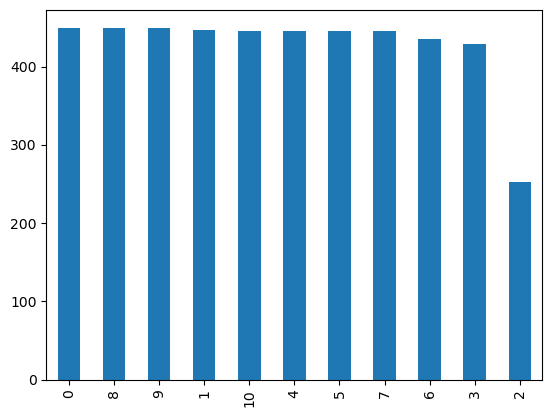

In [16]:
#카테고리별 결측히 확인 : bar plot
# 2 (나일론 / 코치자켓) 에 결측치 다수 존재
musinsa_data['category'].value_counts().plot(kind = 'bar')

In [17]:
#2번 카테고리 drop
musinsa_data.loc[(musinsa_data['category']==2)]

,상품명,url,price,category,reviews
897,라이트 패커블 윈드브레이커_SPJJD25C21,https://www.musinsa.com/app/goods/1856181,39900,2,저는 얇아서 평상시는 못입을거 같고 운동할때만 입을거같아요
898,라이트 패커블 윈드브레이커_SPJJD25C21,https://www.musinsa.com/app/goods/1856181,39900,2,배송은 좀 늦었지만 일할때 편하게 잘입고 있어요
899,라이트 패커블 윈드브레이커_SPJJD25C21,https://www.musinsa.com/app/goods/1856181,39900,2,제품 가벼워요 그리고 데일리 룩으로 정말 손색없네요 일단 저는 정사이즈 잘 맞습니다
900,라이트 패커블 윈드브레이커_SPJJD25C21,https://www.musinsa.com/app/goods/1856181,39900,2,작을거라 생각해서 시켰는데 너무 크네요 ㅜ 평소 사이즈 입는데 정사이즈로 갔으면 더...
901,라이트 패커블 윈드브레이커_SPJJD25C21,https://www.musinsa.com/app/goods/1856181,39900,2,딱 정사이즈 이고 매우 편함 선선한 날씨에 걸치면 좋아용
...,...,...,...,...,...
1144,PERTEX 패커블 윈드브레이커 자켓 블랙,https://www.musinsa.com/app/goods/2379844,139000,2,퍼텍스 원단이라 방풍 속건 능력이 아주 뛰어납니다 적당히 루즈한 핏감으로 스타일리쉬...
1145,PERTEX 패커블 윈드브레이커 자켓 블랙,https://www.musinsa.com/app/goods/2379844,139000,2,좋아요 이쁘고 얇아서 바람막에로 최공요 굿이에요
1146,PERTEX 패커블 윈드브레이커 자켓 블랙,https://www.musinsa.com/app/goods/2379844,139000,2,옷이 생각보다 얇아요 그래도 접어서 가방에 보관하고 다니면서 가볍게 입기 좋습니다
1147,PERTEX 패커블 윈드브레이커 자켓 블랙,https://www.musinsa.com/app/goods/2379844,139000,2,체형 헬린이 약간 운동한 정도 상체발달 초봄이나 밤에 외출 할 때 가볍게 가지고...


In [18]:
#반복문을 통해 제거
for i in range(897,1149):
    musinsa_data = musinsa_data.drop(i)

<Axes: >

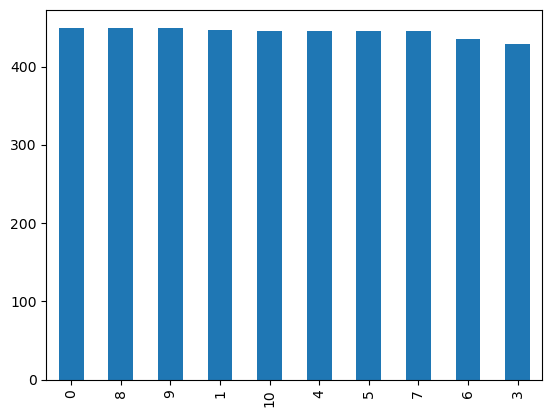

In [19]:
#다시 카테고리별 결측치 확인 
musinsa_data['category'].value_counts().plot(kind = 'bar')

In [21]:
#인덱스 재정렬
musinsa_data = musinsa_data.reset_index(drop=True)
musinsa_data

,상품명,url,price,category,reviews
0,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,0,키가 작아서 와이드인거 감안해도 기장이 상당히 길긴 함 나머진 만족스러움
1,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,0,핏이랑 스타일 좋고 막입어도 이쁨 아무거나 코디해도됨 무난하지만 찌질은 뺌
2,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,0,바지가 이 가격에 말도 안되는 퀄리티에요 다만 여름은 조금 덥다 생각하고 봄 가을 ...
3,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,0,마른사람한테 와이드핏 조금 부담스러울수있는데 핏이 딱좋네요
4,와이드 데님 팬츠 (LIGHT BLUE),https://www.musinsa.com/app/goods/858911,49000,0,색감도 예쁘고 핏도 좋아요 두께감은 좀 있는편이라 여름에는 더울거 같네요
...,...,...,...,...,...
4437,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,10,덩치 있는 초등아이 인데요길이는 좀 길지만 넉넉하게 이쁘네요 색감도 선명하고 옷감도...
4438,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,10,가성비 옷들 중 탑인것 같습니다 마감이 우수하며 활동성이 좋고 편하게 입을 수 있습니다
4439,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,10,체구가 작아서 좀 크지만 오버핏으로 입고 다니려구요 두께는 지금 입기 딱 좋은 거 ...
4440,[무료반품] [패키지] NYC LOCATION SWEATS...,https://www.musinsa.com/app/goods/1643160,118000,10,만족합니다 예뻐요 배송빠름니다 좋아요 품질 좋아요


## 3) EDA
#### - 형태소 분석기
#### - 워드 클라우드 

In [22]:
#카테고리 별 데이터 분할
category_0=musinsa_data.loc[(musinsa_data['category']==0)]
category_1=musinsa_data.loc[(musinsa_data['category']==1)]
category_3=musinsa_data.loc[(musinsa_data['category']==3)]
category_4=musinsa_data.loc[(musinsa_data['category']==4)]
category_5=musinsa_data.loc[(musinsa_data['category']==5)]
category_6=musinsa_data.loc[(musinsa_data['category']==6)]
category_7=musinsa_data.loc[(musinsa_data['category']==7)]
category_8=musinsa_data.loc[(musinsa_data['category']==8)]
category_9=musinsa_data.loc[(musinsa_data['category']==9)]
category_10=musinsa_data.loc[(musinsa_data['category']==10)]

In [24]:
#형태소 분석 : 꼬꼬마(kkma) 사용
import konlpy
kkma = konlpy.tag.Kkma() 

nouns_0 = category_0['reviews'].apply(kkma.nouns)
nouns_1 = category_1['reviews'].apply(kkma.nouns)
nouns_3 = category_3['reviews'].apply(kkma.nouns)
nouns_4 = category_4['reviews'].apply(kkma.nouns)
nouns_5 = category_5['reviews'].apply(kkma.nouns)
nouns_6 = category_6['reviews'].apply(kkma.nouns)
nouns_7 = category_7['reviews'].apply(kkma.nouns)
nouns_8 = category_8['reviews'].apply(kkma.nouns)
nouns_9 = category_9['reviews'].apply(kkma.nouns)
nouns_10 = category_10['reviews'].apply(kkma.nouns)


In [25]:
#문자열 분할하여 배열로 저장
nouns_0 = nouns_0.explode()
nouns_1 = nouns_1.explode()
nouns_3 = nouns_3.explode()
nouns_4 = nouns_4.explode()
nouns_5 = nouns_5.explode()
nouns_6 = nouns_6.explode()
nouns_7 = nouns_7.explode()
nouns_8 = nouns_8.explode()
nouns_9 = nouns_9.explode()
nouns_10 = nouns_10.explode()

In [109]:
#단어와 빈도 수로 데이터프레임 형성
#한글자인 단어 제외
df_0 = pd.DataFrame({'word' : nouns_0})
df_0['count'] = df_0['word'].str.len()
df_0 = df_0.query('count >= 2')
df_0

,word,count
0,와이드,3.0
0,감안,2.0
0,기장,2.0
0,만족,2.0
1,스타일,3.0
...,...,...
448,애ㅔ,2.0
449,생각,2.0
449,기장,2.0
449,그것,2.0


In [110]:
#빈도순서로 재정렬
df_0 = df_0.groupby('word', as_index = False).count().sort_values('count', ascending = False)
df_0

,word,count
209,바지,82
398,여름,61
284,사이즈,58
76,기장,57
298,색감,45
...,...,...
322,세터,1
320,세일기간,1
63,극과,1
318,세여,1


In [111]:
#나머지 9개 카테고리에도 적용
df_1 = pd.DataFrame({'word' : nouns_1})
df_1['count'] = df_1['word'].str.len()
df_1 = df_1.query('count >= 2')
df_1 = df_1.groupby('word', as_index = False).count().sort_values('count', ascending = False)

df_3 = pd.DataFrame({'word' : nouns_3})
df_3['count'] = df_3['word'].str.len()
df_3 = df_3.query('count >= 2')
df_3 = df_3.groupby('word', as_index = False).count().sort_values('count', ascending = False)

df_4 = pd.DataFrame({'word' : nouns_4})
df_4['count'] = df_4['word'].str.len()
df_4 = df_4.query('count >= 2')
df_4 = df_4.groupby('word', as_index = False).count().sort_values('count', ascending = False)

df_5 = pd.DataFrame({'word' : nouns_5})
df_5['count'] = df_5['word'].str.len()
df_5 = df_5.query('count >= 2')
df_5 = df_5.groupby('word', as_index = False).count().sort_values('count', ascending = False)

df_6 = pd.DataFrame({'word' : nouns_6})
df_6['count'] = df_6['word'].str.len()
df_6 = df_6.query('count >= 2')
df_6 = df_6.groupby('word', as_index = False).count().sort_values('count', ascending = False)

df_7 = pd.DataFrame({'word' : nouns_7})
df_7['count'] = df_7['word'].str.len()
df_7 = df_7.query('count >= 2')
df_7 = df_7.groupby('word', as_index = False).count().sort_values('count', ascending = False)

df_8 = pd.DataFrame({'word' : nouns_8})
df_8['count'] = df_8['word'].str.len()
df_8 = df_8.query('count >= 2')
df_8 = df_8.groupby('word', as_index = False).count().sort_values('count', ascending = False)

df_9 = pd.DataFrame({'word' : nouns_9})
df_9['count'] = df_9['word'].str.len()
df_9 = df_9.query('count >= 2')
df_9 = df_9.groupby('word', as_index = False).count().sort_values('count', ascending = False)

df_10 = pd.DataFrame({'word' : nouns_10})
df_10['count'] = df_10['word'].str.len()
df_10 = df_10.query('count >= 2')
df_10 = df_10.groupby('word', as_index = False).count().sort_values('count', ascending = False)

In [112]:
# 추가적인 카테고리 별 불용어 처리 : 인덱스 지정하여 drop
df_0 = df_0.drop([209,284,171,303,49,168])
df_1 = df_1.drop([282,44,184,296,183])
df_3 = df_3.drop([298,357,372,377,185,76,319])
df_4 = df_4.drop([10,388,404,238,85,235])
df_5 = df_5.drop([315,57,330,221])
df_6 = df_6.drop([204,280,179,294,47,605])
df_7 = df_7.drop([381,344,363,240,64,238])
df_8 = df_8.drop([340,746,75,226,225,362])
df_9 = df_9.drop([418,332,60,196,408,350])
df_10 = df_10.drop([299,208,53,203,319,200])

In [113]:
#워드클라우드 시각화를 위하여 딕셔너리 형태로 변환
dic_0 = df_0.set_index('word').to_dict()['count']
dic_1 = df_1.set_index('word').to_dict()['count']
dic_3 = df_3.set_index('word').to_dict()['count']
dic_4 = df_4.set_index('word').to_dict()['count']
dic_5 = df_5.set_index('word').to_dict()['count']
dic_6 = df_6.set_index('word').to_dict()['count']
dic_7 = df_7.set_index('word').to_dict()['count']
dic_8 = df_8.set_index('word').to_dict()['count']
dic_9 = df_9.set_index('word').to_dict()['count']
dic_10 = df_10.set_index('word').to_dict()['count']

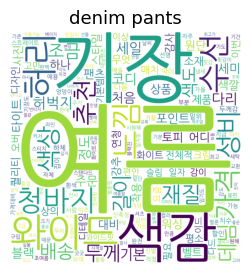

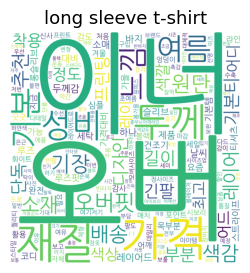

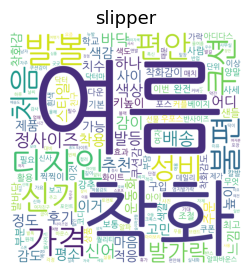

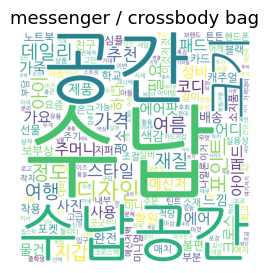

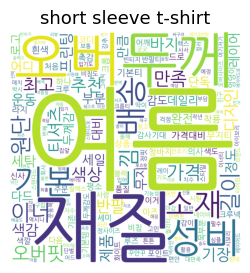

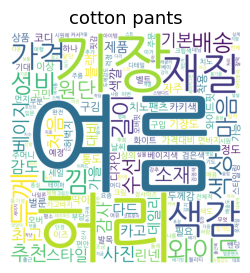

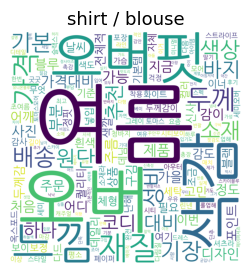

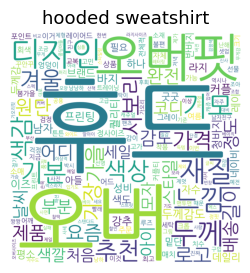

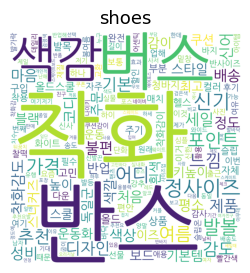

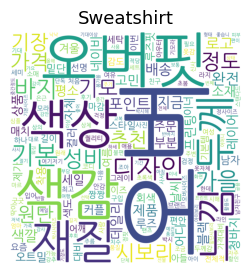

In [114]:
#워드클라우드로 시각화
from wordcloud import WordCloud 
wc = WordCloud(
    random_state = 123, 
    font_path = "C:/Users/KIMJOONBUM/anaconda3/pkgs/nbclassic-0.5.2-py310haa95532_0/Lib/site-packages/nbclassic/static/components/MathJax/jax/output/HTML-CSS/fonts/STIX-Web/NanumGothic.otf", 
    width = 1000,
    height = 1000, 
    background_color = 'white')

img_wordcloud = wc.generate_from_frequencies(dic_0)
plt.figure(figsize = (3, 3)) 
plt.axis('off')
plt.title("denim pants", size = 13)
plt.imshow(img_wordcloud)

img_wordcloud = wc.generate_from_frequencies(dic_1)
plt.figure(figsize = (3, 3)) 
plt.axis('off') 
plt.title("long sleeve t-shirt", size = 13)
plt.imshow(img_wordcloud) 

img_wordcloud = wc.generate_from_frequencies(dic_3)
plt.figure(figsize = (3, 3)) 
plt.axis('off') 
plt.title("slipper", size = 13)
plt.imshow(img_wordcloud) 

img_wordcloud = wc.generate_from_frequencies(dic_4)
plt.figure(figsize = (3, 3)) 
plt.axis('off') 
plt.title("messenger / crossbody bag", size = 13)
plt.imshow(img_wordcloud) 

img_wordcloud = wc.generate_from_frequencies(dic_5)
plt.figure(figsize = (3, 3)) 
plt.axis('off') 
plt.title("short sleeve t-shirt", size = 13)
plt.imshow(img_wordcloud) 

img_wordcloud = wc.generate_from_frequencies(dic_6)
plt.figure(figsize = (3, 3)) 
plt.axis('off') 
plt.title("cotton pants", size = 13)
plt.imshow(img_wordcloud) 

img_wordcloud = wc.generate_from_frequencies(dic_7)
plt.figure(figsize = (3, 3)) 
plt.axis('off') 
plt.title("shirt / blouse", size = 13)
plt.imshow(img_wordcloud) 

img_wordcloud = wc.generate_from_frequencies(dic_8)
plt.figure(figsize = (3, 3)) 
plt.axis('off') 
plt.title("hooded sweatshirt", size = 13)
plt.imshow(img_wordcloud) 

img_wordcloud = wc.generate_from_frequencies(dic_9)
plt.figure(figsize = (3, 3)) 
plt.axis('off') 
plt.title("shoes", size = 13)
plt.imshow(img_wordcloud) 

img_wordcloud = wc.generate_from_frequencies(dic_10)
plt.figure(figsize = (3, 3)) 
plt.axis('off') 
plt.title("Sweatshirt", size = 13)
plt.imshow(img_wordcloud) 

## 4) 결과 해석
#### 1. 각종 카테고리에서 '여름' 키워드 가장 많이 등장 : 기본적으로 의류를 구매할 때 다가오는 계절감에 영향을 많이 받는다.
#### 2. 각종 카테고리에서 '오버', '오버핏' 과 같은 키워드 다수 등장 : 리뷰 분석을 통해서 사용자의 전반적인 니즈나 트렌드 파악 어느 정도 가능
#### 3. 큰 카테고리 속에 속해 있는 카테고리들은 다소 비슷한 양상 : 신발, 상의, 아우터 같은 카테고리는 다소 비슷한 단어들이 등장
#### 4. 긍정 리뷰만 추출 했음에도 '불편'과 같은 단어 등장 : '불편하지 않다' 와 같은 긍정적 리뷰에서 추출됬을 것으로 예상되며 해결해야할 문제점